## MODIS EDA 2020-2021

This is some EDA activities on the MODIS Data export from Jan 1, 2020 to Jan 1 2022

Besides some rounding, I did not transform the data just yet. This file is just looking at 2 years of FIRMS MODIS data.

Any FIRMS data (MODIS or VIIRS) can be requested and downloaded at this link:
https://firms.modaps.eosdis.nasa.gov/download/create.php

The csvs I used for this date range on MODIS can be downloaded with the following link:
https://firms.modaps.eosdis.nasa.gov/data/download/DL_FIRE_M-C61_258142.zip 

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#import the 2 csvs the link returned 2 csvs seperated for the full date range
#if you want to run this yourself you will obviously have to change the csv locations 
dfa = pd.read_csv(r'C:\Users\anderb4\Documents\GeorgetownDSCert\WildfireCapstone\Data\Modis20to22\fire_archive_M-C61_258142.csv')
dfb = pd.read_csv(r'C:\Users\anderb4\Documents\GeorgetownDSCert\WildfireCapstone\Data\Modis20to22\fire_nrt_M-C61_258142.csv')

In [3]:
#print the shape and head
print(dfa.shape)
dfa.head()

(313657, 15)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,31.8349,-83.0561,306.7,1.4,1.2,2020-01-01,324,Terra,MODIS,69,6.03,277.6,18.9,N,0
1,36.3562,-76.8050,300.2,1.2,1.1,2020-01-01,325,Terra,MODIS,20,6.03,278.9,10.2,N,0
2,33.4178,-110.8616,321.5,1.0,1.0,2020-01-01,920,Aqua,MODIS,100,6.03,271.8,24.9,N,2
3,41.4810,-90.8294,310.0,1.0,1.0,2020-01-01,1704,Terra,MODIS,69,6.03,276.5,13.8,D,0
4,38.6973,-90.1281,311.7,1.1,1.0,2020-01-01,1705,Terra,MODIS,54,6.03,282.3,14.1,D,2


In [4]:
print(dfb.shape)
dfb.head()

(3923, 14)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,34.35712,-93.95985,301.42,2.41,1.50,2021-12-01,344,Terra,MODIS,41,6.1NRT,284.52,24.03,N
1,33.44316,-88.57932,307.19,1.21,1.09,2021-12-01,344,Terra,MODIS,71,6.1NRT,280.54,14.92,N
2,33.44534,-88.56660,306.31,1.21,1.09,2021-12-01,344,Terra,MODIS,68,6.1NRT,280.19,14.14,N
3,34.20998,-110.84089,310.56,1.01,1.00,2021-12-01,525,Terra,MODIS,25,6.1NRT,279.95,12.43,N
4,40.55515,-121.94199,300.79,2.62,1.55,2021-12-01,525,Terra,MODIS,34,6.1NRT,284.88,23.76,N


In [5]:
## it looks like "type" was stopped after november 30, 2021 
# I now combine the 2 csvs into one dataframe called df, this will cover the full date range 
df = pd.concat([dfa, dfb])
shape = df.shape
print(shape)
df.head()

(317580, 15)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,31.8349,-83.0561,306.7,1.4,1.2,2020-01-01,324,Terra,MODIS,69,6.03,277.6,18.9,N,0.0
1,36.3562,-76.8050,300.2,1.2,1.1,2020-01-01,325,Terra,MODIS,20,6.03,278.9,10.2,N,0.0
2,33.4178,-110.8616,321.5,1.0,1.0,2020-01-01,920,Aqua,MODIS,100,6.03,271.8,24.9,N,2.0
3,41.4810,-90.8294,310.0,1.0,1.0,2020-01-01,1704,Terra,MODIS,69,6.03,276.5,13.8,D,0.0
4,38.6973,-90.1281,311.7,1.1,1.0,2020-01-01,1705,Terra,MODIS,54,6.03,282.3,14.1,D,2.0


In [6]:
# take a look at the data types 
df.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version        object
bright_t31    float64
frp           float64
daynight       object
type          float64
dtype: object

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

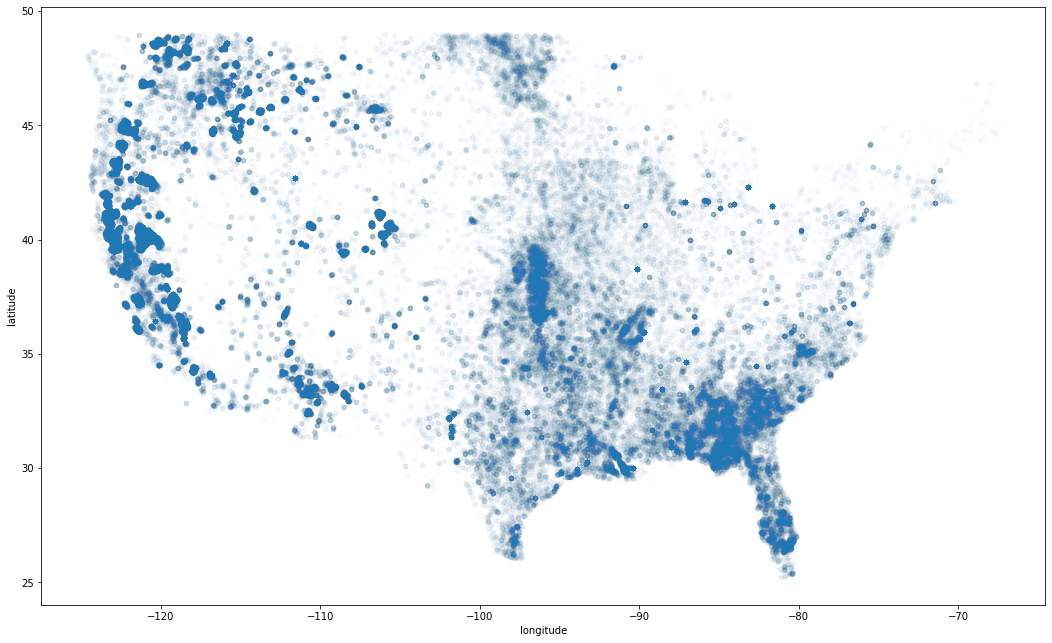

In [7]:
#plotting the points as a heatmap
dfContUS = df.loc[df['longitude'] > -125] #only plot continental US, exclude Alaska and Hawaii 
dfContUS.plot(kind="scatter", x="longitude", y="latitude", alpha=0.01, figsize=(18,11), cmap=plt.get_cmap("jet"))

In [8]:
#add rounded long and lat
df['lat'] = round(df['latitude'])
df['long'] = round(df['longitude'])
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,lat,long
0,31.8349,-83.0561,306.7,1.4,1.2,2020-01-01,324,Terra,MODIS,69,6.03,277.6,18.9,N,0.0,32.0,-83.0
1,36.3562,-76.8050,300.2,1.2,1.1,2020-01-01,325,Terra,MODIS,20,6.03,278.9,10.2,N,0.0,36.0,-77.0
2,33.4178,-110.8616,321.5,1.0,1.0,2020-01-01,920,Aqua,MODIS,100,6.03,271.8,24.9,N,2.0,33.0,-111.0
3,41.4810,-90.8294,310.0,1.0,1.0,2020-01-01,1704,Terra,MODIS,69,6.03,276.5,13.8,D,0.0,41.0,-91.0
4,38.6973,-90.1281,311.7,1.1,1.0,2020-01-01,1705,Terra,MODIS,54,6.03,282.3,14.1,D,2.0,39.0,-90.0


In [9]:
#lets get some general statistics on the df
df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,type,lat,long
count,317580.000000,317580.000000,317580.000000,317580.000000,317580.000000,317580.000000,317580.000000,317580.000000,317580.000000,313657.000000,317580.000000,317580.000000
mean,38.533808,-107.576935,329.289095,1.629055,1.217936,1553.015609,70.891835,296.035178,95.117515,0.071594,38.547780,-107.555284
std,6.075931,16.169091,28.290296,0.828742,0.251745,559.846175,23.937875,10.622342,301.738970,0.364298,6.107363,16.145777
min,18.968600,-176.144600,300.000000,1.000000,1.000000,0.000000,0.000000,264.600000,0.000000,0.000000,19.000000,-176.000000
25%,34.073400,-121.100500,311.100000,1.100000,1.000000,1014.000000,55.000000,290.100000,12.300000,0.000000,34.000000,-121.000000
50%,38.894250,-112.414750,321.100000,1.300000,1.100000,1825.000000,73.000000,295.100000,26.700000,0.000000,39.000000,-112.000000
75%,41.698600,-93.685775,337.900000,1.900000,1.300000,1937.000000,93.000000,300.700000,67.400000,0.000000,42.000000,-94.000000
max,69.514200,-67.387500,508.800000,4.820000,2.000000,2359.000000,100.000000,400.100000,16146.400000,3.000000,70.000000,-67.000000


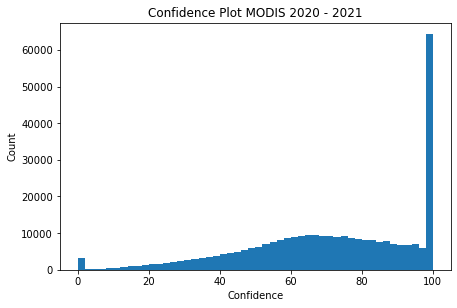

In [10]:
#see what confidence column looks like
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(212)
ax.hist(df['confidence'], bins=50, range=(df['confidence'].min(),df['confidence'].max()))
plt.title('Confidence Plot MODIS 2020 - 2021')
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.show()

The confidence column actually has an interesting distribution. A significant portion of the observations are 100%.

Lets see how much of it is confidence 100%:

In [11]:
#lets count the number of observations that are 100%
conf100count = len(df[df.confidence == 100])
print('The number of confidence 100 values in the data set is: ' + str(conf100count))
conf100perc = (conf100count / shape[0]) * 100
print('The % of observations that have 100% confidence is: ' + str(conf100perc) + '%')

The number of confidence 100 values in the data set is: 58688
The % of observations that have 100% confidence is: 18.479753133068833%


Now plotting brightness. According to the website, "brightness temperature is actually a measure of the photons at a particular wavelength received by the spacecraft, but presented in units of temperature". The brightness temperature of a fire pixel is measured (in Kelvin)

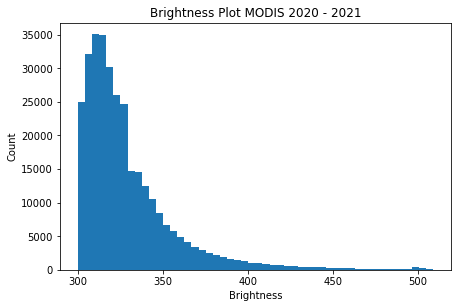

In [12]:
#see what brightness column looks like
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(212)
ax.hist(df['brightness'], bins=50, range=(df['brightness'].min(),df['brightness'].max()))
plt.title('Brightness Plot MODIS 2020 - 2021')
plt.xlabel('Brightness')
plt.ylabel('Count')
plt.show()

Brightness appears to have a long right side tail which is very believable and makes sense. There also seems to be some extreme values near about 500 brightness looking at the distribution which is noteworthy.

Acq time is in military it seems, so lets just plot it and see how it looks next.

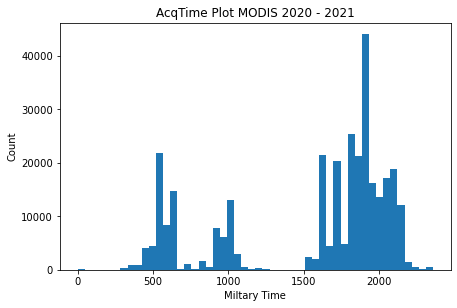

In [13]:
#plot time now
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(212)
ax.hist(df['acq_time'], bins=50, range=(df['acq_time'].min(),df['acq_time'].max()))
plt.title('AcqTime Plot MODIS 2020 - 2021')
plt.xlabel('Miltary Time')
plt.ylabel('Count')
plt.show()

This is an intersting distribution of acq time. My theory is that its because the satellite passes by only at certain intervals?

The scan value represents the spatial-resolution in the East-West direction of the scan and the track value represents the North-South spatial resolution of the scan. 

Now plot scan and track and frp:

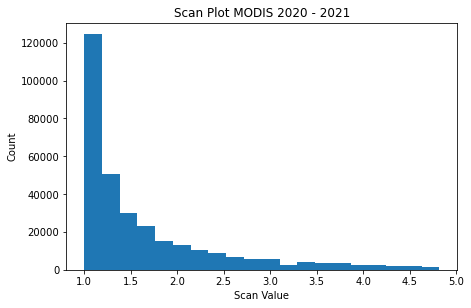

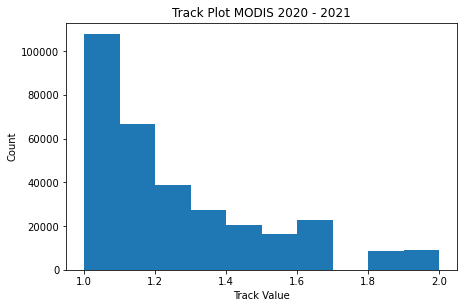

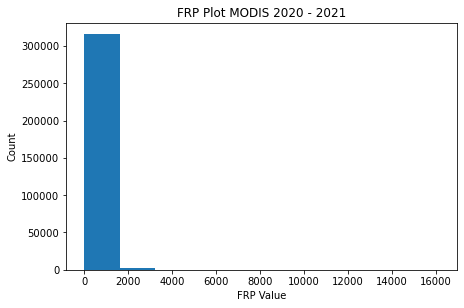

In [14]:
#plot scan
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(212)
ax.hist(df['scan'], bins=20, range=(df['scan'].min(),df['scan'].max()))
plt.title('Scan Plot MODIS 2020 - 2021')
plt.xlabel('Scan Value')
plt.ylabel('Count')
plt.show()

#plot track
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(212)
ax.hist(df['track'], bins=10, range=(df['track'].min(),df['track'].max()))
plt.title('Track Plot MODIS 2020 - 2021')
plt.xlabel('Track Value')
plt.ylabel('Count')
plt.show()

#plot frp
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(212)
ax.hist(df['frp'], bins=10, range=(df['frp'].min(),df['frp'].max()))
plt.title('FRP Plot MODIS 2020 - 2021')
plt.xlabel('FRP Value')
plt.ylabel('Count')
plt.show()

FRP seems to have a lot of extreme values, which is noteworthy. 

Now getting a correlation matrix just for curiosity to see how it is:

In [15]:
#get a correlation matrix
df.corr(method = 'pearson')

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,type,lat,long
latitude,1.000000,-0.513472,0.109794,0.021503,0.019246,-0.109429,0.075373,-0.036342,0.056484,-0.093901,0.998874,-0.513667
longitude,-0.513472,1.000000,-0.300490,-0.072614,-0.076439,0.247149,-0.232802,-0.088361,-0.158678,0.117776,-0.510296,0.999841
brightness,0.109794,-0.300490,1.000000,-0.030438,-0.027439,0.113199,0.597344,0.643121,0.673032,-0.081399,0.109280,-0.300311
scan,0.021503,-0.072614,-0.030438,1.000000,0.983209,-0.007869,-0.022032,-0.086180,0.206527,-0.053988,0.021399,-0.072533
track,0.019246,-0.076439,-0.027439,0.983209,1.000000,-0.010933,-0.019973,-0.085412,0.204204,-0.057627,0.019141,-0.076329
acq_time,-0.109429,0.247149,0.113199,-0.007869,-0.010933,1.000000,-0.082798,0.325279,0.033922,-0.034145,-0.108487,0.247117
confidence,0.075373,-0.232802,0.597344,-0.022032,-0.019973,-0.082798,1.000000,0.281717,0.271089,-0.109049,0.074865,-0.232785
bright_t31,-0.036342,-0.088361,0.643121,-0.086180,-0.085412,0.325279,0.281717,1.000000,0.410995,-0.022902,-0.036202,-0.088208
frp,0.056484,-0.158678,0.673032,0.206527,0.204204,0.033922,0.271089,0.410995,1.000000,-0.034589,0.056247,-0.158438
type,-0.093901,0.117776,-0.081399,-0.053988,-0.057627,-0.034145,-0.109049,-0.022902,-0.034589,1.000000,-0.094866,0.117416


In [16]:
#checking day vs night values
df['daynight'].value_counts()

D    226983
N     90597
Name: daynight, dtype: int64

it is interesting that there are much more day observations than night observations.

Taking a look at the different satellite types:

In [17]:
#looking at different satellite images 
dfExp['satellite'].value_counts()

NameError: name 'dfExp' is not defined

It seems to be close to half "Aqua" and half "Terra"

Checking to make sure the only instrument is 'MODIS':

In [ ]:
#checking modis counts
df['instrument'].value_counts()

In [ ]:
#checking the "type" counts
df['type'].value_counts()

In [ ]:
#checking version types 
df['version'].value_counts()